In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('./Data Files/RestaurantVisitors.csv', index_col='date', parse_dates=True)

In [4]:
df.index.freq = 'D'

In [5]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [6]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [7]:
df1 = df.dropna()

In [8]:
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [9]:
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [10]:
cols = ['rest1', 'rest2', 'rest3','rest4', 'total']

In [12]:
for column in cols:
    df1[column] = df1[column].astype(int)

In [13]:
df1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


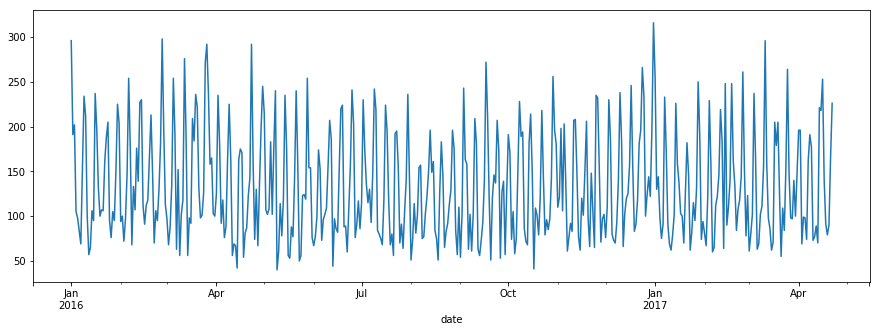

In [14]:
df1['total'].plot(figsize=(15,5))

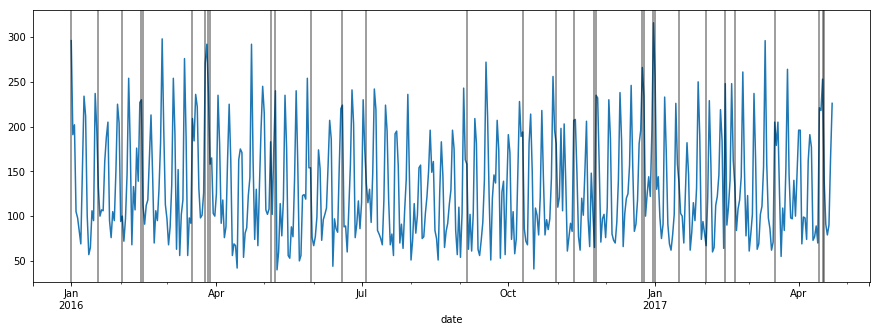

In [16]:
ax = df1['total'].plot(figsize=(15,5))
for day in df1.query('holiday==1').index:
    ax.axvline(x=day, color='black', alpha=0.5);

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

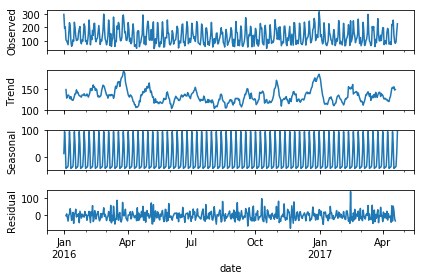

In [18]:
result = seasonal_decompose(df1['total'])
result.plot();

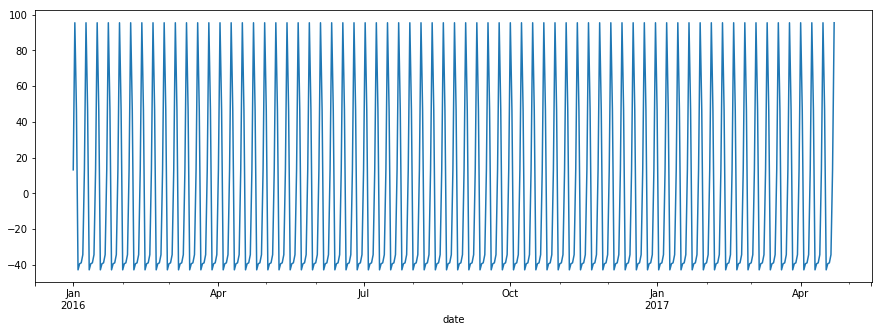

In [19]:
result.seasonal.plot(figsize=(15,5));

In [20]:
len(df1)

478

In [21]:
train = df1.iloc[:436]
test = df1.iloc[436:]

In [22]:
from pmdarima import auto_arima

In [75]:
auto_arima(df1['total'], seasonal=True, m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Statespace Model Results                           
===============================================================================
Dep. Variable:                       y   No. Observations:                  478
Model:             SARIMAX(1, 0, 1, 7)   Log Likelihood               -2384.908
Date:                 Thu, 02 Jan 2020   AIC                           4777.816
Time:                         18:05:50   BIC                           4794.495
Sample:                              0   HQIC                          4784.373
                                 - 478                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.9779      1.671      2.979      0.003       1.702       8.253
ar.S.L7        0.9602      0.013     74.406      0.000       0.935       0.985
ma.S.L7       -0.7410      0.049    -15.252      0.000      -0.836      -0.646
sigma2      1193.9784     69.427     17.198      0.000    1057.904    1330.053
===================================================================================
Ljung-Box (Q):                       68.47   Jarque-Bera (JB):                62.56
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.74
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [88]:
model = SARIMAX(train['total'], order=(1, 0, 0), seasonal_order=(2, 0, 0, 7), enforce_invertibility=True)

In [89]:
results = model.fit()

In [90]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2224.701
Date:                           Thu, 02 Jan 2020   AIC                           4457.403
Time:                                   18:07:35   BIC                           4473.713
Sample:                               01-01-2016   HQIC                          4463.840
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2212      0.047      4.711      0.000       0.129       0.313
ar.S.L7        0.5063      0.036     14.187      0.000       0.436       0.576
ar.S.L14       0.4574      0.037     12.379      0.000       0.385       0.530
sigma2      1520.2899     82.277     18.478      0.000    1359.029    1681.550
===================================================================================
Ljung-Box (Q):                       83.96   Jarque-Bera (JB):                29.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.34
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [91]:
start = len(train)
end = len(train)+ len(test) - 1

In [92]:
predictions = results.predict(start, end).rename('SARIMA Model')

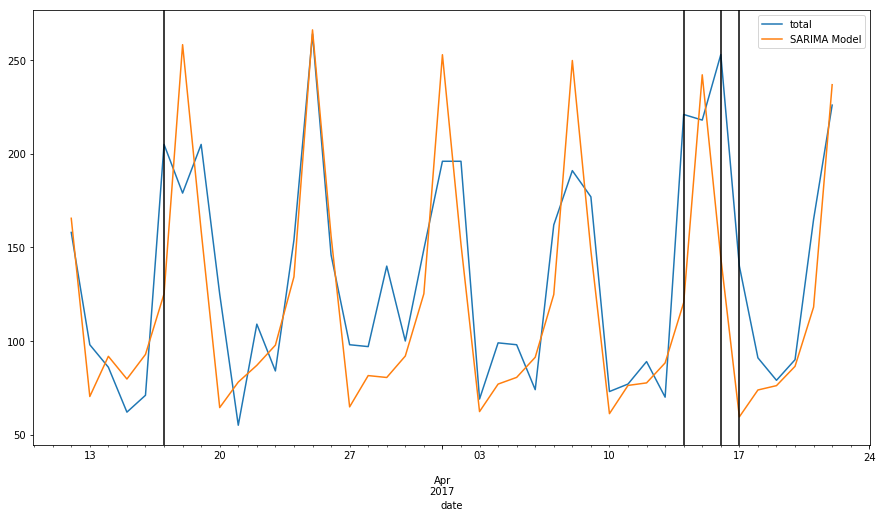

In [106]:
ax = test['total'].plot(legend=True, figsize=(15,8))
predictions.plot(legend=True)

for day in test.query('holiday==1').index:
    ax.axvline(x=day, color='black')

In [100]:
test.query('holiday==1').index


DatetimeIndex(['2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'], dtype='datetime64[ns]', name='date', freq=None)

In [107]:
from statsmodels.tools.eval_measures import rmse

In [108]:
rmse(test['total'], predictions)

41.263154947712025

In [109]:
test['total'].mean()

134.26190476190476

In [110]:
auto_arima(df1['total'], exogenous=df1[['holiday']], seasonal=True, m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2372.014
Date:                           Thu, 02 Jan 2020   AIC                           4756.027
Time:                                   18:20:21   BIC                           4781.045
Sample:                               01-01-2016   HQIC                          4765.863
                                    - 04-22-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2621      1.310      0.200      0.841      -2.305       2.829
holiday       82.1346      4.027     20.395      0.000      74.242      90.028
ar.L1          0.1007      0.048      2.099      0.036       0.007       0.195
ar.S.L7        0.5612      0.038     14.948      0.000       0.488       0.635
ar.S.L14       0.4366      0.038     11.607      0.000       0.363       0.510
sigma2      1106.7041     69.333     15.962      0.000     970.813    1242.595
===================================================================================
Ljung-Box (Q):                      104.11   Jarque-Bera (JB):                 3.13
Prob(Q):                              0.00   Prob(JB):                         0.21
Heteroskedasticity (H):               0.93   Skew:                             0.03
Prob(H) (two-sided):                  0.64   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [111]:
%%markdown

# TRAIN our SARIMAX


# TRAIN our SARIMAX

In [112]:
model = SARIMAX(train['total'], exog=train[['holiday']], order=(1,0,0), 
                seasonal_order=(2,0,0,7), enforce_invertibility=False)

In [113]:
result = model.fit()

In [115]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2158.482
Date:                           Thu, 02 Jan 2020   AIC                           4326.963
Time:                                   18:22:15   BIC                           4347.352
Sample:                               01-01-2016   HQIC                          4335.010
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       66.8896      4.241     15.774      0.000      58.578      75.201
ar.L1          0.2145      0.049      4.375      0.000       0.118       0.311
ar.S.L7        0.5147      0.042     12.312      0.000       0.433       0.597
ar.S.L14       0.4575      0.042     10.997      0.000       0.376       0.539
sigma2      1117.3977     73.302     15.244      0.000     973.729    1261.066
===================================================================================
Ljung-Box (Q):                      100.96   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               0.91   Skew:                             0.11
Prob(H) (two-sided):                  0.58   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [116]:
start = len(train)
end = len(train) + len(test) - 1

In [117]:
predictions = result.predict(start, end, exog=test[['holiday']]).rename('SARIMAX with Exog')

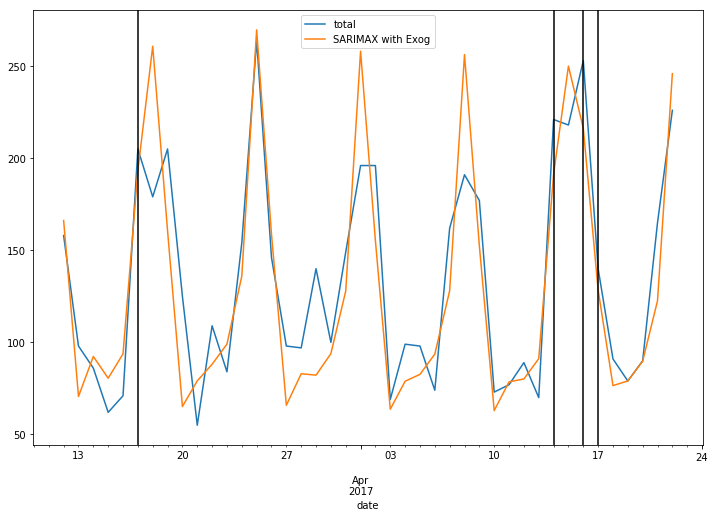

In [120]:
ax = test['total'].plot(legend=True)
predictions.plot(figsize=(12,8), legend=True)

for day in test.query('holiday==1').index:
    ax.axvline(x=day, color='black')

In [119]:
rmse(test['total'], predictions)

30.832862871208505

In [121]:
test['total'].mean()

134.26190476190476

In [123]:
model = SARIMAX(df1['total'], exog=df1[['holiday']], order=(1,0,0), 
                seasonal_order=(2,0,0,7), enforce_invertibility=False)

In [124]:
results = model.fit()

In [128]:
exog_forecast = df[478:][['holiday']]

In [129]:
fcast = results.predict(len(df1), len(df1)+38, exog=exog_forecast).rename("Final SARIMAX Forecast")

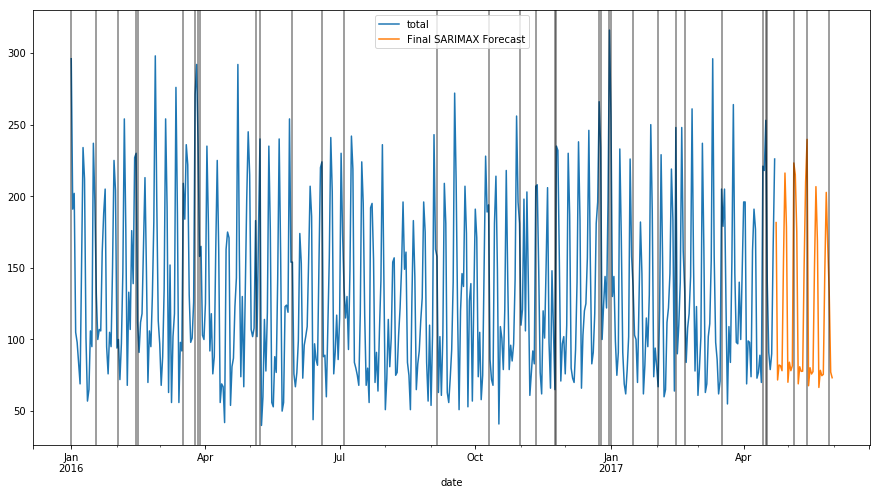

In [133]:
ax = df1['total'].plot(figsize=(15,8), legend=True)
fcast.plot(legend=True)

for day in df.query('holiday==1').index:
    ax.axvline(x=day, color='black', alpha=0.5)